<a href="https://colab.research.google.com/github/IsaacMartindeDiego/IA/blob/master/Regresi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regresión**

En este sencillo ejemplo vamos a estudiar técnicas básicas de regresión. El problema que vamos a abordar consiste en predecir las ventas a partir de los anuncios de TV, radio y periódicos.


# **Adquisición de los Datos**



In [27]:
# Importamos las librerías necesarias 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Librerías para la construcción de modelos
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split

In [28]:
# Lectura de la base de datos
df=pd.read_csv("https://raw.githubusercontent.com/IsaacMartindeDiego/IA/master/advertising.csv")
df.head(5)  


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# **Análisis Exploratorio de Datos**

En primer lugar vamos a obtener el tampo de la base de datos.

In [29]:
df.shape

(200, 4)

Disponemos de *200* observaciones y *4* variables para tabajar. Estudiemos a continuación el tipo de las variables y la presencia o no de valores faltantes.

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


Todas las variables son de tipo continuo y además no existen valores faltantes. 

Obtenemos a continuación una breve descripción estadística de las variables.

In [31]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


Podemos visualizar las variables para *intuir* la distribución de las mismas.

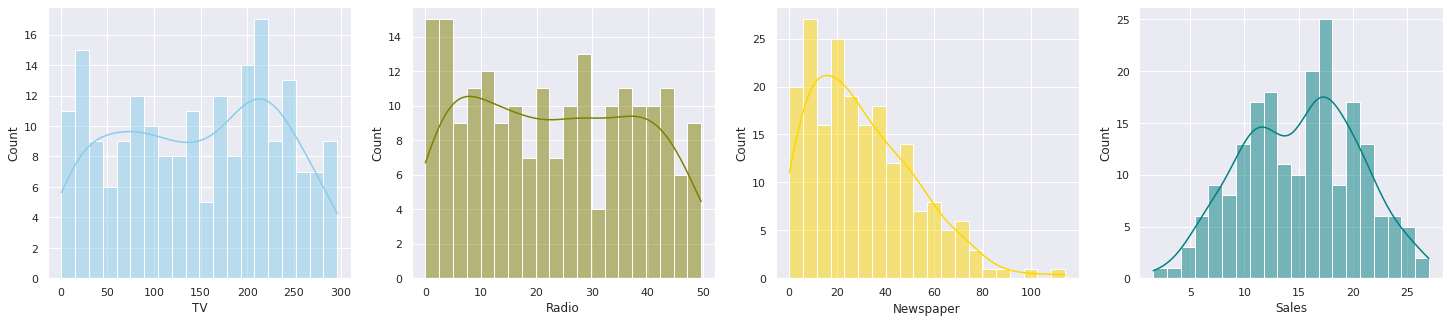

In [49]:
# Histograma de las variables de trabajo
sns.set(style="darkgrid")
fig, axs = plt.subplots(1, 4, figsize=(25, 5))

sns.histplot(data=df, x="TV", kde=True, color="skyblue", ax=axs[0],bins=20)
sns.histplot(data=df, x="Radio", kde=True, color="olive", ax=axs[1],bins=20)
sns.histplot(data=df, x="Newspaper", kde=True, color="gold", ax=axs[ 2],bins=20)
sns.histplot(data=df, x="Sales", kde=True, color="teal", ax=axs[3],bins=20)

plt.show()

## Correlación de las variables predictivas con la variable respuesta

Los siguientes gráficos dan una estimación de la relación existente entre las variables. Especialmente de la posibilidad de predecir la variable *Sales* en base a las otras variables.

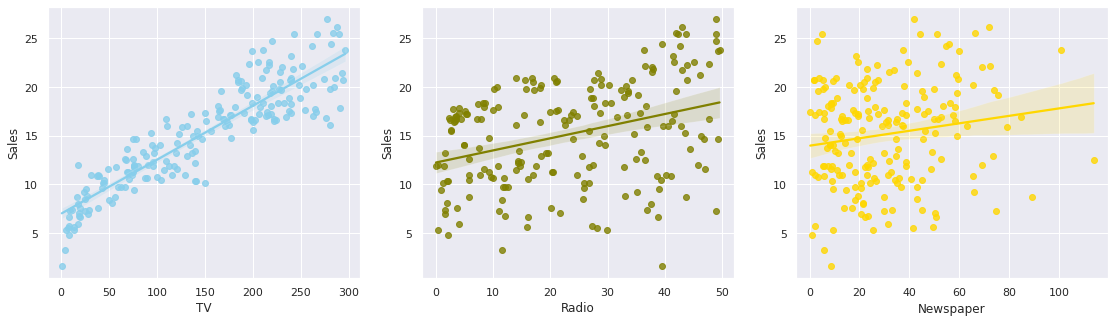

In [54]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(1, 3, figsize=(19, 5))
sns.regplot(data=df, x="TV", y= "Sales", color="skyblue", ax=axs[0])
sns.regplot(data=df, x="Radio", y="Sales", color="olive", ax=axs[1])
sns.regplot(data=df, x="Newspaper", y="Sales", color="gold", ax=axs[2])

plt.show()

Estimamos los coeficientes de correlación y los visualizamos.

In [55]:
df.corr()



,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


Confirmamos numéricamente que la correlación más alta se da entre el gasto en *TV* y las *Sales*. Obviamente la diagonal de la matriz de correlaciones es *1*. Es posible visualizar estos resultados de manera gráfica.

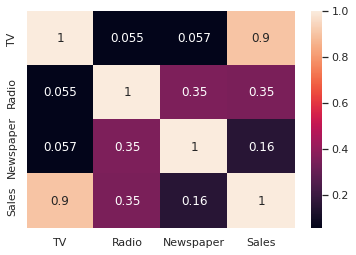

In [56]:
sns.heatmap(df.corr(), annot=True)


# **Modelización**

Los pasos que vamos a seguir para construir el modelo de regresión lineal son:

1. Creamos las variables respuesta y predictiva
2. Dividimos la base de datos en *Train* y *Test* (80-20).
3. Entrenamos el modelo de regresión. Es decir, estimamos los coeficientes de la recta de regresión.
4. Evaluamos el modelo.

In [57]:
# Creamos las variables para el modelo
X= df['TV']
y=df['Sales']

## Partición de la base de datos en TRAIN y TEST

In [58]:
X_train, X_test, y_train, y_test= train_test_split(X,y, train_size=0.80, random_state=100)

## Entrenar el modelo de regresión lineal simple

In [62]:
X_train_sm=sm.add_constant(X_train)
#fitting the model
lr=sm.OLS(y_train, X_train_sm)
lr_model=lr.fit()
lr_model.summary()



/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     727.7
Date:                Thu, 06 Oct 2022   Prob (F-statistic):           5.03e-61
Time:                        08:19:27   Log-Likelihood:                -359.57
No. Observations:                 160   AIC:                             723.1
Df Residuals:                     158   BIC:                             729.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9955      0.343     20.386      0.000       6.318       7.673
TV             0.0541      0.002     26.976      0.000       0.050       0.058
==============================================================================
Omnibus:                        0.122   Durbin-Watson:                   2.203
Prob(Omnibus):                  0.941   Jarque-Bera (JB):                0.029
Skew:                           0.032   Prob(JB):                        0.986
Kurtosis:                       3.014   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Sin entrar en grandes detalles. La recta de regresión es:
$Sales= 6.9955 + 0.0541 \cdot TV$

Y la interpretación es como sigue: Por cada incremento de una unidad en la publicidad en televisión, se produce un incremento de 0.0541 en las ventas. En otras palabras, por cada incremento de 100 en la variable *TV* se produce un incremento de 5.41 en las ventas.

El valor de $R²$ igual a *82.2%* nos informa de que la recta de regresión refleja una parte relevante de la información.

---
**DSLAB- Isaac Martín de Diego - 2022**